## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [5]:
"""
confirm hardware resorce
"""
# cmd -> nvidia-smi.exe -l

'\nconfirm hardware resorce\n'

In [3]:
import os
import keras

# set GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "os.environ"

D:\Tools\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Tools\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [65]:
## data preprocessing
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

def preproc_x(x, flatten=True):
    for i in range(len(x)):
        for j in range(len(x[i])):
            x[i][j] = mms.fit_transform(x[i][j].tolist())
    
    if flatten:
        x = x.reshape((len(x), -1))
        
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [66]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [67]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 30]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [68]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 30)                1950      
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total para

In [69]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [70]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [71]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 264us/step - loss: 2.2007 - acc: 0.1846 - val_loss: 2.1455 - val_acc: 0.2119
Epoch 2/100
50000/50000 [==============================] - 12s 245us/step - loss: 1.9678 - acc: 0.2975 - val_loss: 2.1433 - val_acc: 0.2297
Epoch 3/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.4741 - acc: 0.4825 - val_loss: 2.3951 - val_acc: 0.2193
Epoch 4/100
50000/50000 [==============================] - 15s 305us/step - loss: 0.8009 - acc: 0.7236 - val_loss: 3.4033 - val_acc: 0.2135
Epoch 5/100
50000/50000 [==============================] - 17s 335us/step - loss: 0.3995 - acc: 0.8637 - val_loss: 4.3134 - val_acc: 0.2075
Epoch 6/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.2213 - acc: 0.9269 - val_loss: 5.3742 - val_acc: 0.1940
Epoch 7/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.1463 - acc: 0.9521 - val_l

50000/50000 [==============================] - 13s 250us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 7.5299 - val_acc: 0.1962
Epoch 59/100
50000/50000 [==============================] - 13s 270us/step - loss: 0.0164 - acc: 0.9944 - val_loss: 7.7354 - val_acc: 0.1985
Epoch 60/100
50000/50000 [==============================] - 14s 278us/step - loss: 0.0194 - acc: 0.9941 - val_loss: 7.3577 - val_acc: 0.1944
Epoch 61/100
50000/50000 [==============================] - 14s 283us/step - loss: 0.0184 - acc: 0.9943 - val_loss: 7.4787 - val_acc: 0.1996
Epoch 62/100
50000/50000 [==============================] - 14s 279us/step - loss: 0.0133 - acc: 0.9958 - val_loss: 7.9132 - val_acc: 0.1977
Epoch 63/100
50000/50000 [==============================] - 14s 279us/step - loss: 0.0203 - acc: 0.9934 - val_loss: 7.5441 - val_acc: 0.1955
Epoch 64/100
50000/50000 [==============================] - 12s 247us/step - loss: 0.0204 - acc: 0.9936 - val_loss: 7.2535 - val_acc: 0.1988
Epoch 65/100
50000/50000 [

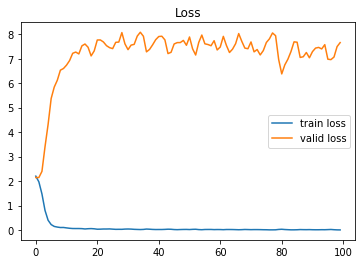

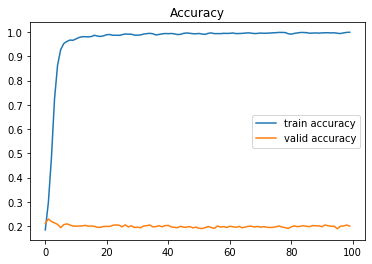

In [72]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()